## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [7]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [8]:
train, test = keras.datasets.cifar10.load_data()

In [9]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [10]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [11]:
def build_mlp(input_shape, output_units=10, num_neurons=[128, 128, 128, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [12]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [13]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 128)               393344    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               16512     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               16512     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               16512     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 444,170
Trainable params: 

Epoch 47/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.5342 - acc: 0.4594 - val_loss: 1.6754 - val_acc: 0.4156
Epoch 48/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.5466 - acc: 0.4540 - val_loss: 1.7061 - val_acc: 0.3984
Epoch 49/50
50000/50000 [==============================] - 8s 154us/step - loss: 1.5326 - acc: 0.4584 - val_loss: 1.6416 - val_acc: 0.4258
Epoch 50/50
50000/50000 [==============================] - 7s 147us/step - loss: 1.5367 - acc: 0.4574 - val_loss: 1.6611 - val_acc: 0.4163
Experiment with LR = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 128)               393344    
_________________________________________________________________
hidden_layer2 (Den

50000/50000 [==============================] - 7s 147us/step - loss: 0.6852 - acc: 0.7518 - val_loss: 1.7526 - val_acc: 0.5117
Epoch 48/50
50000/50000 [==============================] - 7s 137us/step - loss: 0.6751 - acc: 0.7560 - val_loss: 1.7914 - val_acc: 0.5124
Epoch 49/50
50000/50000 [==============================] - 8s 150us/step - loss: 0.6607 - acc: 0.7605 - val_loss: 1.8641 - val_acc: 0.5133
Epoch 50/50
50000/50000 [==============================] - 7s 140us/step - loss: 0.6426 - acc: 0.7668 - val_loss: 1.8057 - val_acc: 0.5131
Experiment with LR = 0.001000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 128)               393344    
_________________________________________________________________
hidden_layer2 (Dense)        (

50000/50000 [==============================] - 7s 139us/step - loss: 1.0817 - acc: 0.6134 - val_loss: 1.4174 - val_acc: 0.5061
Epoch 48/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.0792 - acc: 0.6136 - val_loss: 1.4541 - val_acc: 0.5051
Epoch 49/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.0699 - acc: 0.6190 - val_loss: 1.4122 - val_acc: 0.5050
Epoch 50/50
50000/50000 [==============================] - 7s 142us/step - loss: 1.0611 - acc: 0.6225 - val_loss: 1.3999 - val_acc: 0.5131
Experiment with LR = 0.000100
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 128)               393344    
_________________________________________________________________
hidden_layer2 (Dense)        (

50000/50000 [==============================] - 7s 132us/step - loss: 1.6276 - acc: 0.4249 - val_loss: 1.6340 - val_acc: 0.4163
Epoch 48/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.6227 - acc: 0.4269 - val_loss: 1.6345 - val_acc: 0.4175
Epoch 49/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.6178 - acc: 0.4283 - val_loss: 1.6226 - val_acc: 0.4265
Epoch 50/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.6128 - acc: 0.4301 - val_loss: 1.6211 - val_acc: 0.4248


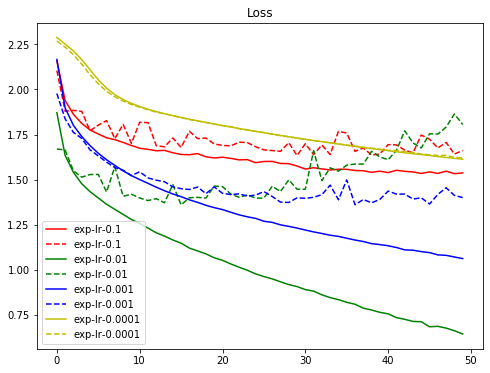

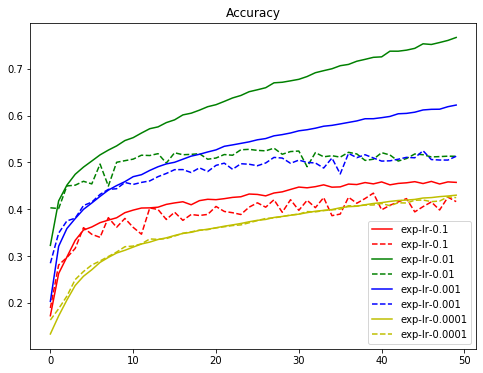

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()